In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers

In [2]:
model = models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'), 
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'), 
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'), 
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dropout(0.5), 
    Dense(512, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model.summary()

2022-10-23 04:54:39.354987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 04:54:39.355873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 04:54:39.547132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 04:54:39.548019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 04:54:39.548835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Vamos a tratar los datos...

In [3]:
train_datagenerator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagenerator.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train', 
                                        target_size = (150, 150), 
                                        batch_size = 32, 
                                        class_mode = 'binary'
                                       )

validation_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation', 
                                        target_size = (150, 150), 
                                        batch_size = 32, 
                                        class_mode = 'binary'
                                       )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [11]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [14]:
hist = model.fit(train_generator, 
                 steps_per_epoch=2000//32, 
                 epochs=100, 
                 validation_data=validation_generator, 
                 validation_steps=1000//32, 
                 callbacks=[checkpoint]
                )

Epoch 1/100
62/62 [==============================] - 20s 330ms/step - loss: 0.6926 - accuracy: 0.5122 - val_loss: 0.6869 - val_accuracy: 0.5615

Epoch 00001: val_accuracy improved from 0.50907 to 0.56149, saving model to modelo_perros_gatos.hdf5
Epoch 2/100
62/62 [==============================] - 19s 311ms/step - loss: 0.6846 - accuracy: 0.5412 - val_loss: 0.6927 - val_accuracy: 0.5030

Epoch 00002: val_accuracy did not improve from 0.56149
Epoch 3/100
62/62 [==============================] - 20s 325ms/step - loss: 0.6871 - accuracy: 0.5183 - val_loss: 0.6612 - val_accuracy: 0.5907

Epoch 00003: val_accuracy improved from 0.56149 to 0.59073, saving model to modelo_perros_gatos.hdf5
Epoch 4/100
62/62 [==============================] - 20s 325ms/step - loss: 0.6592 - accuracy: 0.5823 - val_loss: 0.7493 - val_accuracy: 0.5423

Epoch 00004: val_accuracy did not improve from 0.59073
Epoch 5/100
62/62 [==============================] - 19s 314ms/step - loss: 0.6878 - accuracy: 0.5279 - val_

In [15]:
import matplotlib.pyplot as plt

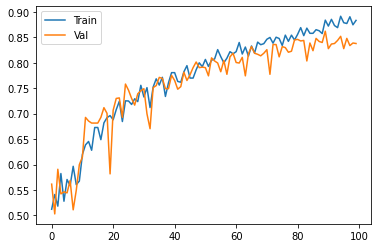

In [16]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation', 
                                        target_size = (150, 150), 
                                        batch_size = 32, 
                                        class_mode = 'binary'
                                       )

Found 1000 images belonging to 2 classes.


In [18]:
model2 = model

In [19]:
model2.load_weights('./modelo_perros_gatos.hdf5')

In [20]:
model2.evaluate(test_generator)

32/32 [==============================] - 5s 145ms/step - loss: 0.3619 - accuracy: 0.8620


[0.3619064390659332, 0.8619999885559082]